<a href="https://colab.research.google.com/github/HemantAjmer/Aviation_EDA/blob/main/WT_EDA_AVIATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as yd

In [2]:
data1 = pd.read_csv("https://drive.google.com/uc?id=1i122X1_xp5pDQ9xqw8zNdfRYv1CtBJMV&export=download")
data = pd.read_csv("https://drive.google.com/uc?id=1jUc0MOwQThzo-Zwr27r-Z3txG7xCneQ2&export=download")

<ipython-input-2-a50f9c53c731>:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://drive.google.com/uc?id=1jUc0MOwQThzo-Zwr27r-Z3txG7xCneQ2&export=download")


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

# Cleaning the data

In [4]:
# As there are only few rows having blank countries, so even after removing those rows it will not effect data.
data.dropna(subset=['Location', 'Country'], inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88612 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88612 non-null  object 
 1   Investigation.Type      88612 non-null  object 
 2   Accident.Number         88612 non-null  object 
 3   Event.Date              88612 non-null  object 
 4   Location                88612 non-null  object 
 5   Country                 88612 non-null  object 
 6   Latitude                34376 non-null  object 
 7   Longitude               34367 non-null  object 
 8   Airport.Code            50063 non-null  object 
 9   Airport.Name            52623 non-null  object 
 10  Injury.Severity         87612 non-null  object 
 11  Aircraft.damage         85441 non-null  object 
 12  Aircraft.Category       32266 non-null  object 
 13  Registration.Number     87257 non-null  object 
 14  Make                    88550 non-null  obj

In latitude and longitude plenty of data is missing. It's not goood to remove this column as it's important. so i'll just replacing the blank cells in both with the most occured lattitude and longitude with respect to Locationn column. with the help of dictionary i gave done that.

In [6]:
lat_dict = data.groupby('Location')['Latitude'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()
lon_dict = data.groupby('Location')['Longitude'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

# Replace missing latitude and longitude values with the most frequent values for each location
data['Latitude'] = data.apply(lambda row: lat_dict.get(row['Location'], row['Latitude']), axis=1)
data['Longitude'] = data.apply(lambda row: lon_dict.get(row['Location'], row['Longitude']), axis=1)

<ipython-input-6-6553bc46f5e7>:1: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  lat_dict = data.groupby('Location')['Latitude'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()
<ipython-input-6-6553bc46f5e7>:2: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  lon_dict = data.groupby('Location')['Longitude'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()


In [7]:
print(lat_dict)
print(lon_dict)

{'(N) SKWENTNA, AK': nan, ',': '006200S', ', AO': '037386N', ', Austria': nan, ', Gabon': nan, ', Greece': nan, ', Hungary': nan, ', Ireland': nan, ', Las Americas': nan, '0WASSO, OK': nan, '1 1/2 MI.N. MAY, KS': nan, '1/4NM S. OF PEO, OR': nan, '10 EAST OF TILL, OR': nan, '10 M.N. OF GILR, CA': nan, '10 NM E. OF KEN, ID': nan, '10 NM W LEE VIN, CA': nan, '10 SW FALLS CIT, NE': nan, '10 SW OF MILAN, MO': nan, '10 WEST OF BIGG, CA': nan, '100MI S.KNG SLM, AK': nan, '10MI. NW WALSEN, CO': nan, '10NM N. OF MCNA, AZ': nan, '11 MI. S. OF DU, AZ': nan, '11MI. SO.OFTELL, CO': nan, '11MI.SW OF SILV, NV': nan, '11NM EAST OF SI, AK': nan, '12 N.E. BURBANK, CA': nan, '120 NM SSE OF M, FL': nan, '12NM EAST OF AN, CA': nan, '13 SE OF LINDEN, CA': nan, '15MI. NE OF CHR, CO': nan, '15N OF MEDFORD, OR': nan, '15NM W. OPA LOC, FL': nan, '16NM NO. OF PIE, ID': nan, '18NM ESE KETCHI, AK': nan, '1NM N. OR MCGRE, NE': nan, '2 MI EAST MINA, NV': nan, '20 ESE NORTH PO, AK': nan, '20MN OF JACKSON, WY': nan, '

In [8]:
import re
import numpy as np

def clean_coordinates(value):
    if isinstance(value, str):
        cleaned_value = re.sub(r'[^\d.-]', '', value)
        try:
            return float(cleaned_value)
        except ValueError:
            return np.nan
    return value

data['Latitude'] = data['Latitude'].apply(clean_coordinates)
data['Longitude'] = data['Longitude'].apply(clean_coordinates)

In [9]:
data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88612 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88612 non-null  object 
 1   Investigation.Type      88612 non-null  object 
 2   Accident.Number         88612 non-null  object 
 3   Event.Date              88612 non-null  object 
 4   Location                88612 non-null  object 
 5   Country                 88612 non-null  object 
 6   Latitude                66232 non-null  float64
 7   Longitude               66250 non-null  float64
 8   Airport.Code            50063 non-null  object 
 9   Airport.Name            52623 non-null  object 
 10  Injury.Severity         87612 non-null  object 
 11  Aircraft.damage         85441 non-null  object 
 12  Aircraft.Category       32266 non-null  object 
 13  Registration.Number     87257 non-null  object 
 14  Make                    88550 non-null  obj

After above process also some more blank cells were there. so i have used KNNImputer to replace with it most nearest.

In [11]:
from sklearn.impute import KNNImputer

# Assuming 'Latitude' and 'Longitude' are the only columns with missing values
knn_imputer = KNNImputer(n_neighbors=5)
data[['Latitude', 'Longitude']] = knn_imputer.fit_transform(data[['Latitude', 'Longitude']])

# Converting datatype of both columns having date

In [12]:
data['Event.Date'] = pd.to_datetime(data['Event.Date'])

In [13]:
data['Publication.Date'] = pd.to_datetime(data['Publication.Date'])

<ipython-input-13-ffeb1c35e8cd>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Publication.Date'] = pd.to_datetime(data['Publication.Date'])


Handling nulls in other columns

In [14]:
data['Schedule'].fillna('Unknown', inplace=True)
data['FAR.Description'].fillna('Unknown', inplace=True)

<ipython-input-14-72f78033007d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Schedule'].fillna('Unknown', inplace=True)
<ipython-input-14-72f78033007d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [15]:
data['Total.Serious.Injuries'] = data.groupby('Injury.Severity')['Total.Serious.Injuries'].transform(lambda x: x.fillna(x.median()))
data['Total.Fatal.Injuries'] = data.groupby('Injury.Severity')['Total.Fatal.Injuries'].transform(lambda x: x.fillna(x.median()))
data['Total.Minor.Injuries'] = data.groupby('Injury.Severity')['Total.Minor.Injuries'].transform(lambda x: x.fillna(x.median()))

# Impute Broad phase of flight based on the mode of each Weather Condition

In [16]:
data['Broad.phase.of.flight'] = data.groupby('Weather.Condition')['Broad.phase.of.flight'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

data['Broad.phase.of.flight'].fillna(data['Broad.phase.of.flight'].mode()[0], inplace=True)


<ipython-input-16-2d9e9838e95a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Broad.phase.of.flight'].fillna(data['Broad.phase.of.flight'].mode()[0], inplace=True)


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88612 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88612 non-null  object        
 1   Investigation.Type      88612 non-null  object        
 2   Accident.Number         88612 non-null  object        
 3   Event.Date              88612 non-null  datetime64[ns]
 4   Location                88612 non-null  object        
 5   Country                 88612 non-null  object        
 6   Latitude                88612 non-null  float64       
 7   Longitude               88612 non-null  float64       
 8   Airport.Code            50063 non-null  object        
 9   Airport.Name            52623 non-null  object        
 10  Injury.Severity         87612 non-null  object        
 11  Aircraft.damage         85441 non-null  object        
 12  Aircraft.Category       32266 non-null  object     

In [58]:
import re

data['Injury.Severity'] = data['Injury.Severity'].str.replace(r'Fatal\(\d+\)', 'Fatal', regex=True)

# Impute Aircraft.Category based on the mode within each Make

In [18]:
data['Aircraft.Category'] = data.groupby('Make')['Aircraft.Category'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

#remaining missing values with 'Unknown'
data['Aircraft.Category'].fillna('Unknown', inplace=True)


<ipython-input-18-60b17c795c1f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Aircraft.Category'].fillna('Unknown', inplace=True)


In [19]:
data['Air.carrier'].fillna('Unknown', inplace=True)

<ipython-input-19-62fbd5c76c88>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Air.carrier'].fillna('Unknown', inplace=True)


for Airport name we can create dictionary from rows where both 'Airport.Code' and 'Airport.Name' are available. and after that we can replace it with null

In [20]:
airport_name_dict = data.dropna(subset=['Airport.Code', 'Airport.Name']).set_index('Airport.Code')['Airport.Name'].to_dict()

data['Airport.Name'] = data.apply(lambda row: airport_name_dict.get(row['Airport.Code'], row['Airport.Name']), axis=1)


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88612 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88612 non-null  object        
 1   Investigation.Type      88612 non-null  object        
 2   Accident.Number         88612 non-null  object        
 3   Event.Date              88612 non-null  datetime64[ns]
 4   Location                88612 non-null  object        
 5   Country                 88612 non-null  object        
 6   Latitude                88612 non-null  float64       
 7   Longitude               88612 non-null  float64       
 8   Airport.Code            50063 non-null  object        
 9   Airport.Name            53459 non-null  object        
 10  Injury.Severity         87612 non-null  object        
 11  Aircraft.damage         85441 non-null  object        
 12  Aircraft.Category       88612 non-null  object     

In [22]:
data[['Airport.Code']].fillna('Unknown', inplace=True)
data[['Airport.Name']].fillna('Unknown', inplace=True)

<ipython-input-22-d14d35c35a9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Airport.Code']].fillna('Unknown', inplace=True)
<ipython-input-22-d14d35c35a9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Airport.Name']].fillna('Unknown', inplace=True)


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88612 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88612 non-null  object        
 1   Investigation.Type      88612 non-null  object        
 2   Accident.Number         88612 non-null  object        
 3   Event.Date              88612 non-null  datetime64[ns]
 4   Location                88612 non-null  object        
 5   Country                 88612 non-null  object        
 6   Latitude                88612 non-null  float64       
 7   Longitude               88612 non-null  float64       
 8   Airport.Code            88612 non-null  object        
 9   Airport.Name            88612 non-null  object        
 10  Injury.Severity         88612 non-null  object        
 11  Aircraft.damage         88612 non-null  object        
 12  Aircraft.Category       88612 non-null  object     

In [24]:
for col in data.columns[data.dtypes=='object']:
    data[col] = data[col].fillna('Unknown')

Outliers based on Z-score:
Empty DataFrame
Columns: [Event.Id, Investigation.Type, Accident.Number, Event.Date, Location, Country, Latitude, Longitude, Airport.Code, Airport.Name, Injury.Severity, Aircraft.damage, Aircraft.Category, Registration.Number, Make, Model, Amateur.Built, Number.of.Engines, Engine.Type, FAR.Description, Schedule, Purpose.of.flight, Air.carrier, Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured, Weather.Condition, Broad.phase.of.flight, Report.Status, Publication.Date]
Index: []

[0 rows x 31 columns]

Outliers based on IQR:
             Event.Id Investigation.Type Accident.Number Event.Date  \
4      20041105X01764           Accident      CHI79FA064 1979-08-02   
24     20020917X02255           Accident      LAX82FA040 1982-01-03   
34     20020917X01880           Accident      CHI82FA019 1982-01-04   
41     20020917X01993           Accident      FTW82DA037 1982-01-05   
44     20020917X01651           Accident      ANC82FA01

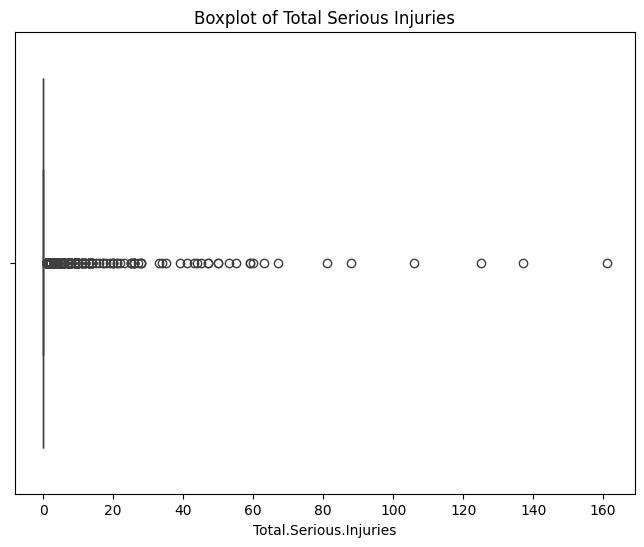

In [28]:
from scipy import stats

def find_outliers_zscore(data, column, threshold=3):
    z = np.abs(stats.zscore(data[column]))
    outliers = data[(z > threshold)]
    return outliers

outliers_zscore = find_outliers_zscore(data, 'Total.Serious.Injuries')
print("Outliers based on Z-score:")
print(outliers_zscore)


def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = data[(data[column]<lower)|(data[column]>upper)]
    return outliers

outliers_iqr = find_outliers_iqr(data, 'Total.Serious.Injuries')
print("\nOutliers based on IQR:")
print(outliers_iqr)

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Total.Serious.Injuries'])
plt.title('Boxplot of Total Serious Injuries')
plt.show()

#  handle outliers

In [29]:
cap_value = data['Total.Serious.Injuries'].quantile(0.99)
data['Total.Serious.Injuries'] = data['Total.Serious.Injuries'].apply(lambda x: min(x, cap_value))

In [33]:
data['Event_year']=data['Event.Date'].dt.year
data['publicatin_year']= data['Publication.Date'].dt.year

# Correlation between Weather and Severity

In [37]:
weather_mapping = {
        'UNK': 0,  # Unknown
        'VMC': 1,  # Visual Meteorological Conditions
        'IMC': 2   # Instrument Meteorological Conditions
    }
data['Weather_Num'] = data['Weather.Condition'].map(weather_mapping)

In [38]:
correlation_matrix = data[['Weather_Num', 'Total.Serious.Injuries', 'Total.Fatal.Injuries', 'Total.Minor.Injuries']].corr()
print(correlation_matrix)

                        Weather_Num  Total.Serious.Injuries  \
Weather_Num                1.000000                0.018765   
Total.Serious.Injuries     0.018765                1.000000   
Total.Fatal.Injuries       0.078149                0.032616   
Total.Minor.Injuries       0.011095                0.081083   

                        Total.Fatal.Injuries  Total.Minor.Injuries  
Weather_Num                         0.078149              0.011095  
Total.Serious.Injuries              0.032616              0.081083  
Total.Fatal.Injuries                1.000000              0.048361  
Total.Minor.Injuries                0.048361              1.000000  


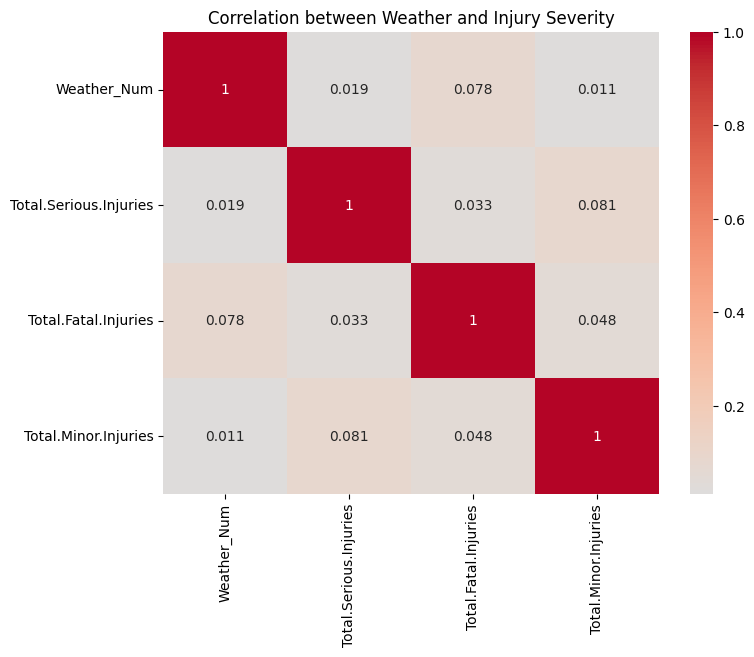

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Weather and Injury Severity')
plt.show()

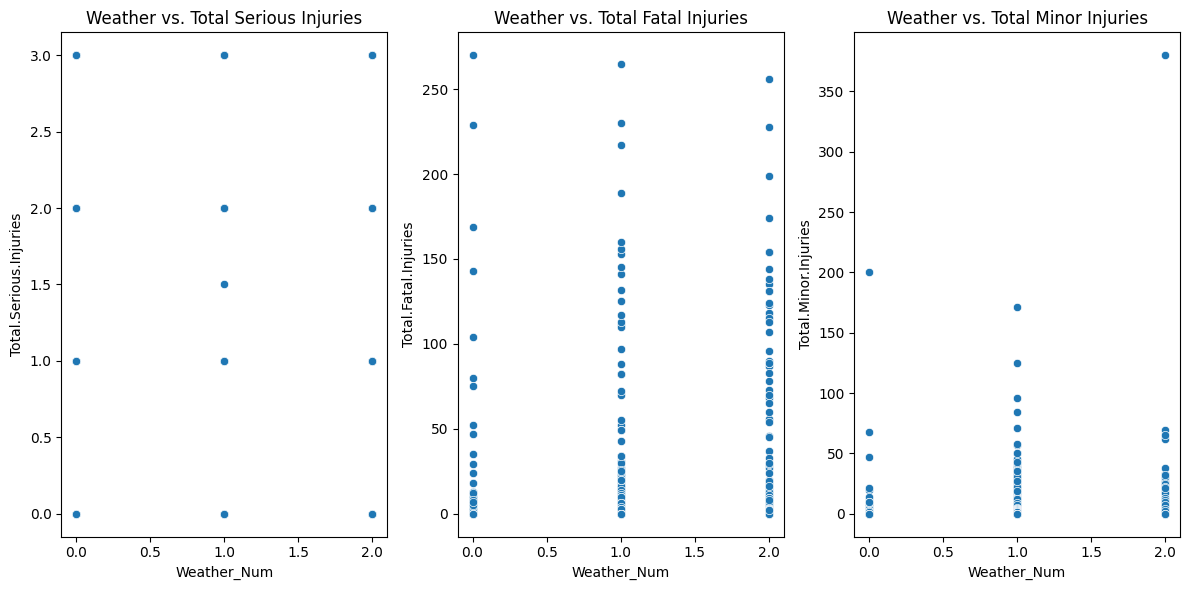

In [40]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Weather_Num', y='Total.Serious.Injuries', data=data)
plt.title('Weather vs. Total Serious Injuries')
plt.subplot(1, 3, 2)
sns.scatterplot(x='Weather_Num', y='Total.Fatal.Injuries', data=data)
plt.title('Weather vs. Total Fatal Injuries')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Weather_Num', y='Total.Minor.Injuries', data=data)
plt.title('Weather vs. Total Minor Injuries')

plt.tight_layout()
plt.show()

The fact that all weather types have instances of fatal and minor injuries suggests that accidents leading to injuries are influenced by multiple factors beyond just weather conditions.

In [ ]:
resport= yd.ProfileReport(data)
resport.to_widgets()

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:528: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 3 ... 9 9 9]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# Airport Analysis

Airport.Name
Fan Creek                       1483
PVT                              501
Centennial                       160
CHICAGO O'HARE INTL              149
MERRILL FLD                      137
PRIVATE                          118
Denver International Airport     115
Wittman Regional                 109
Van Nuys                         104
Rocky Mountain Metro Airport     102
Name: Event.Id, dtype: int64


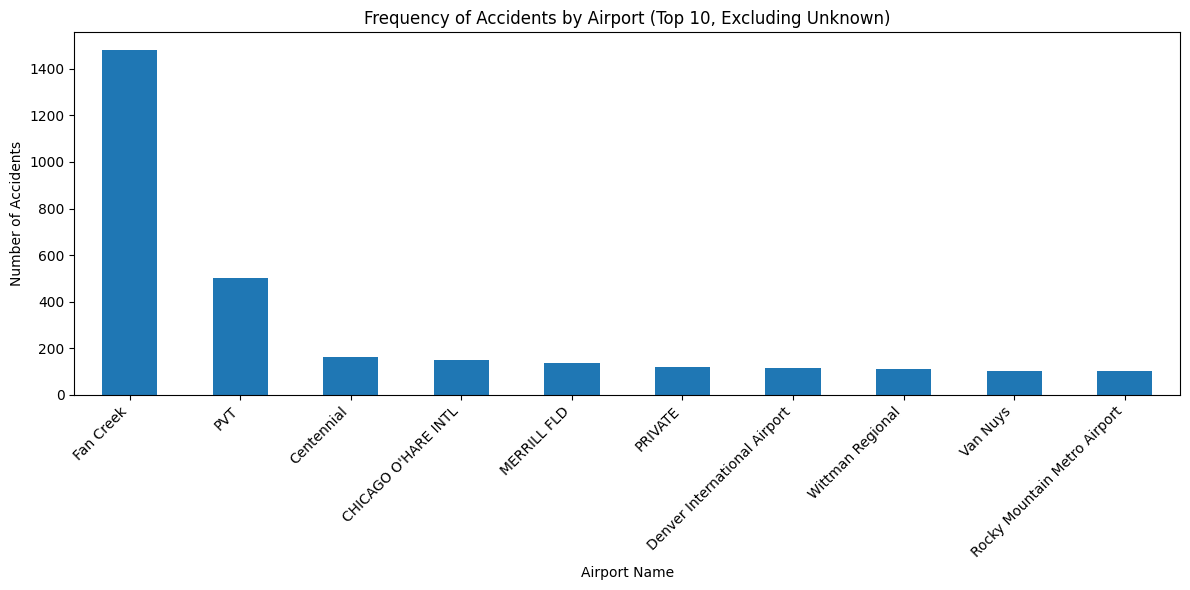

In [44]:
airport_accident_counts = data[data['Airport.Name']!='Unknown']\
    .groupby('Airport.Name')['Event.Id'] \
    .count()\
    .sort_values(ascending=False)

# Display the top 10 airports with the highest accident counts
print(airport_accident_counts.head(10))

plt.figure(figsize=(12, 6))
airport_accident_counts.head(10).plot(kind='bar')
plt.title('Frequency of Accidents by Airport (Top 10, Excluding Unknown)')
plt.xlabel('Airport Name')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [46]:
filtered_data = data[(data['Airport.Name'] != 'Unknown') & (data['Airport.Name'] != '')]

In [47]:
top_airports = filtered_data['Airport.Name'].value_counts().head(10).index

In [49]:
common_factors = filtered_data[filtered_data['Airport.Name'].isin(top_airports)] \
    .groupby('Airport.Name')[['Weather.Condition', 'Broad.phase.of.flight', 'Aircraft.Category']] \
    .agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')

print(common_factors)

                             Weather.Condition Broad.phase.of.flight  \
Airport.Name                                                           
CHICAGO O'HARE INTL                        VMC               Landing   
Centennial                                 VMC               Landing   
Denver International Airport               VMC                  Taxi   
Fan Creek                                  VMC               Landing   
MERRILL FLD                                VMC               Landing   
PRIVATE                                    VMC               Takeoff   
PVT                                        VMC               Landing   
Rocky Mountain Metro Airport               VMC               Landing   
Van Nuys                                   VMC               Landing   
Wittman Regional                           VMC               Landing   

                             Aircraft.Category  
Airport.Name                                    
CHICAGO O'HARE INTL                  

# Aircraft analysis

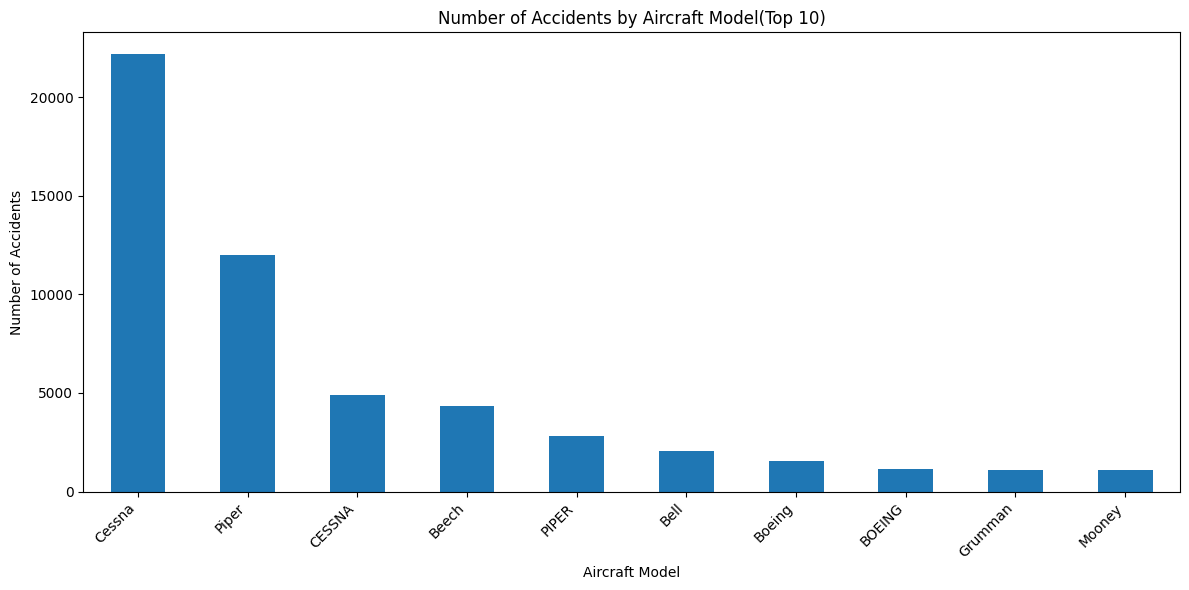

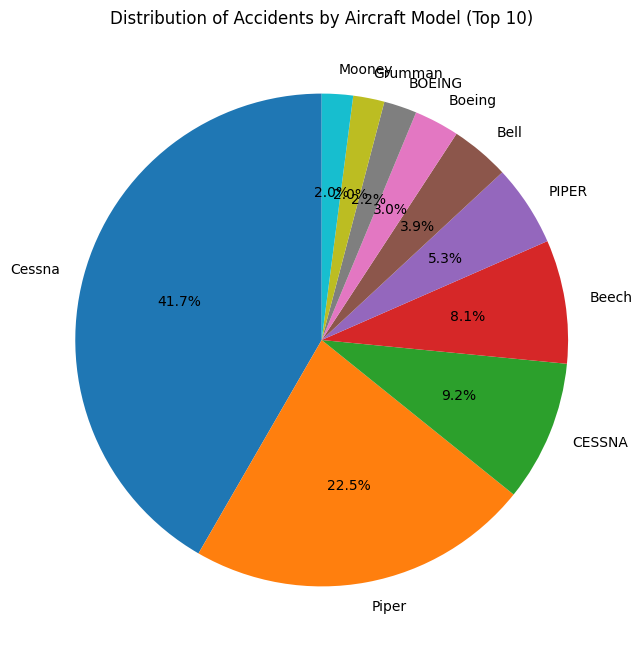

In [52]:
aircraft_accident_counts = data.groupby('Make')['Event.Id'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
aircraft_accident_counts.head(10).plot(kind='bar')
plt.title('Number of Accidents by Aircraft Model(Top 10)')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
aircraft_accident_counts.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Accidents by Aircraft Model (Top 10)')
plt.ylabel('')
plt.show()

In [57]:
schedule_mode = data['Schedule'].mode()[0]

data['Schedule'] = data['Schedule'].replace('Unknown', schedule_mode)

if 'Aircraft.damage' in data.columns:
    aircraft_damage_mode = data['Aircraft.damage'].mode()[0]
    data['Aircraft.damage'] = data['Aircraft.damage'].replace('Unknown', aircraft_damage_mode)
else:
    print("'Aircraft.damage' column not found in the DataFrame.")

# Engine type analysis

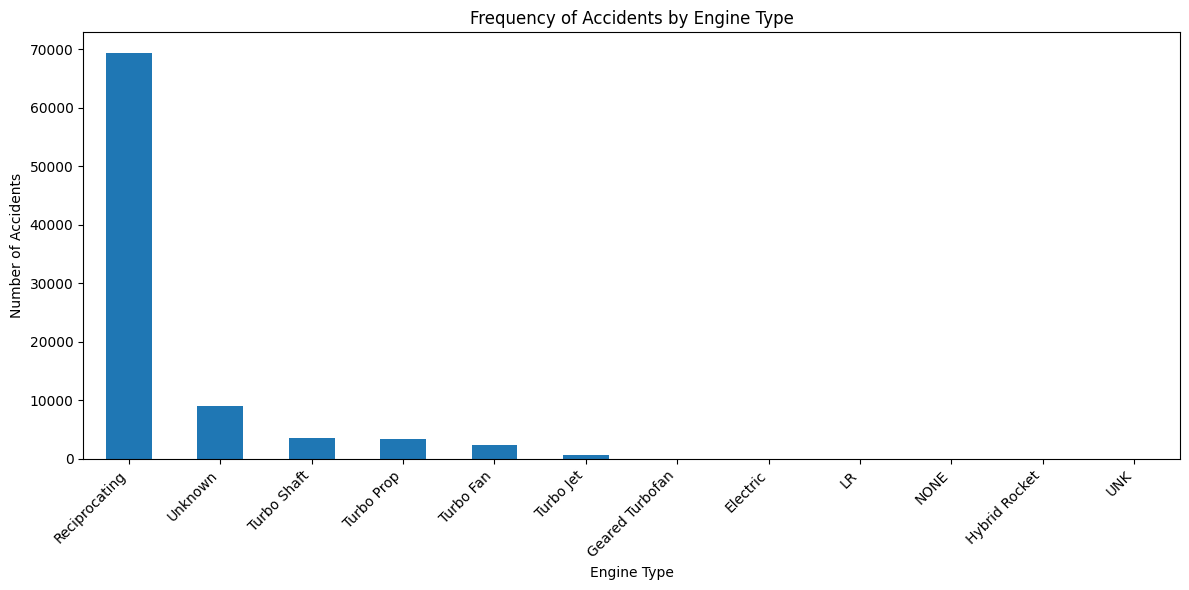

In [60]:
engine_accident_counts = data.groupby('Engine.Type')['Event.Id'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
engine_accident_counts.plot(kind='bar')
plt.title('Frequency of Accidents by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

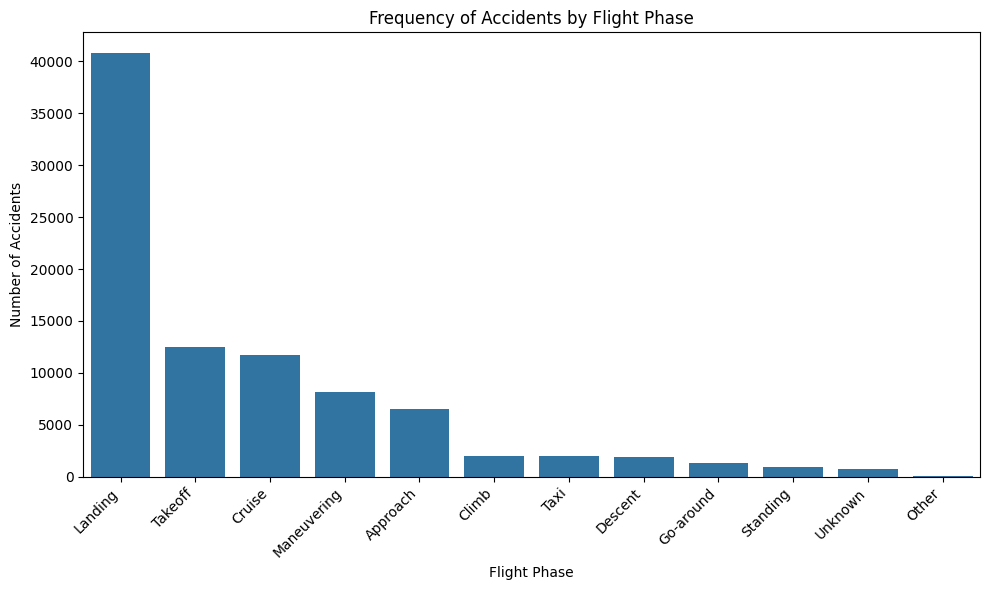

Broad.phase.of.flight
Landing        40748
Takeoff        12450
Cruise         11750
Maneuvering     8114
Approach        6524
Climb           2015
Taxi            1949
Descent         1874
Go-around       1351
Standing         932
Unknown          786
Other            119
Name: Event.Id, dtype: int64


In [62]:
accident_counts_by_phase = data.groupby('Broad.phase.of.flight')['Event.Id'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=accident_counts_by_phase.index, y=accident_counts_by_phase.values)
plt.title('Frequency of Accidents by Flight Phase')
plt.xlabel('Flight Phase')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(accident_counts_by_phase)

As we know landing is most crucial part of flight. Accidents can be caused by wrong approaches, runway problems or poor weather conditions.

#  Impact of Flight Phase on Severity

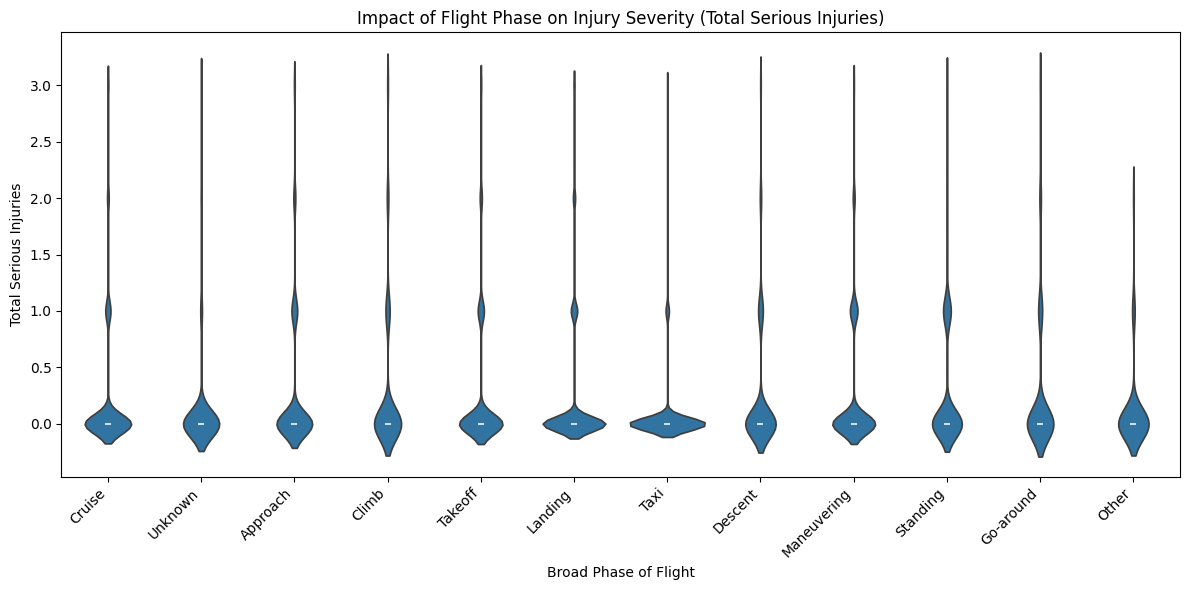

In [63]:
plt.figure(figsize=(12, 6))

sns.violinplot(x='Broad.phase.of.flight', y='Total.Serious.Injuries', data=data)

plt.title('Impact of Flight Phase on Injury Severity (Total Serious Injuries)')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Total Serious Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Factors Associated with Fatality Rates

In [64]:
make_fatality_rate = data.groupby('Make')['Total.Fatal.Injuries'].sum() / data.groupby('Make')['Event.Id'].count()
make_fatality_rate = make_fatality_rate.sort_values(ascending=False)

print(make_fatality_rate.head(10))  #top 10

Make
Tupolev               210.000000
TUPOLEV                44.500000
VIKING AIR LIMITED     23.000000
Aviocar CASA           18.000000
SUKHOI                 14.333333
Mil                    13.000000
Mil Design Bureau      13.000000
ANTONOV                11.833333
Embraer Aircraft       10.000000
AIRvan                  9.000000
dtype: float64


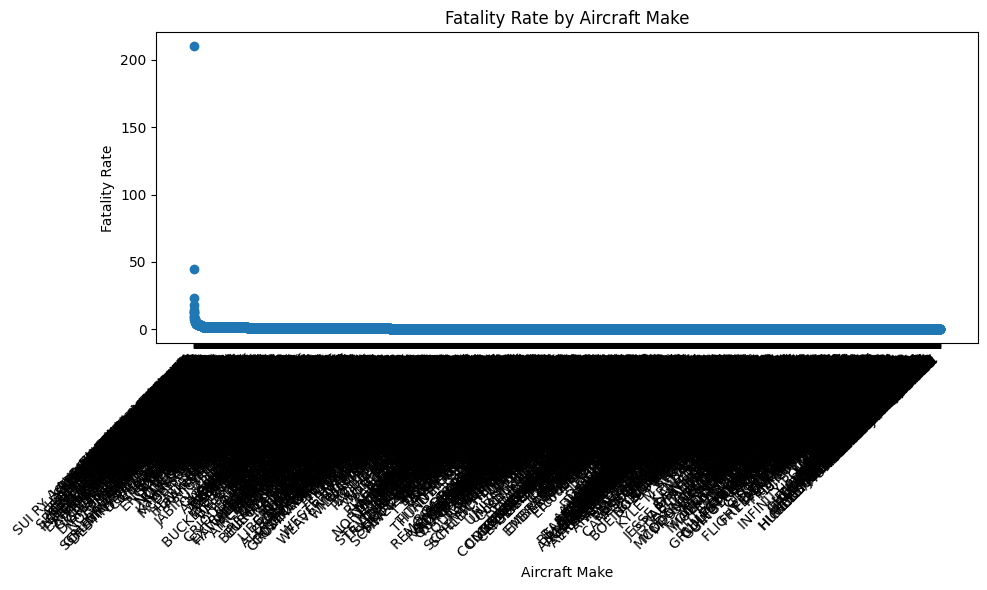

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(make_fatality_rate.index, make_fatality_rate.values)
plt.title('Fatality Rate by Aircraft Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Fatality Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Number.of.Engines
4.0    3.917647
3.0    1.844538
2.0    0.948569
0.0    0.331148
1.0    0.317553
6.0    0.000000
8.0    0.000000
dtype: float64


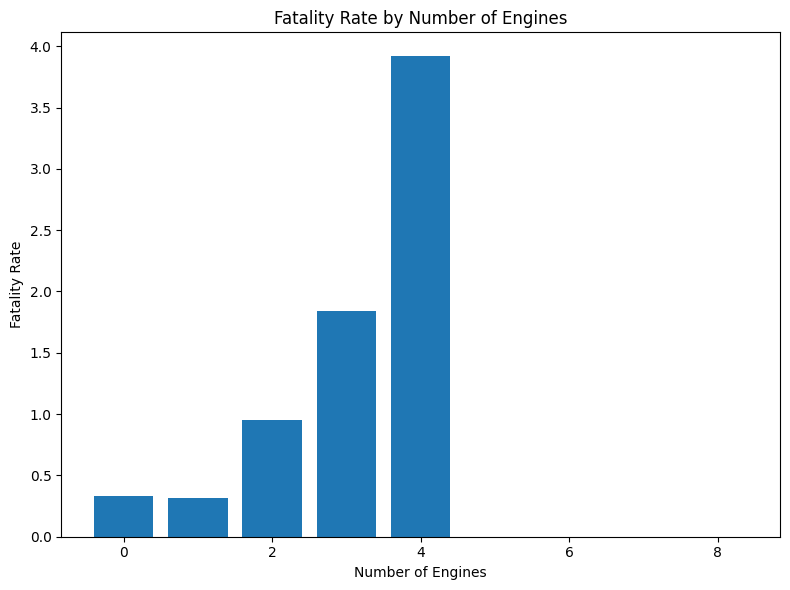

In [66]:
engine_fatality_rate = data.groupby('Number.of.Engines')['Total.Fatal.Injuries'].sum() / data.groupby('Number.of.Engines')['Event.Id'].count()
engine_fatality_rate = engine_fatality_rate.sort_values(ascending=False)

print(engine_fatality_rate)

plt.figure(figsize=(8, 6))
plt.bar(engine_fatality_rate.index, engine_fatality_rate.values)
plt.title('Fatality Rate by Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Fatality Rate')
plt.tight_layout()
plt.show()

# Engine Count and Survival Likelihood

In [68]:
data['Total.Injuries'] = data['Total.Fatal.Injuries']+data['Total.Serious.Injuries']+data['Total.Minor.Injuries']

data['Survival.Rate'] = 1-(data['Total.Fatal.Injuries']/data['Total.Injuries'])
data['Survival.Rate'].fillna(1, inplace=True)

<ipython-input-68-6b78fa9f9a20>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Survival.Rate'].fillna(1, inplace=True)


In [70]:
engine_survival_rate = data.groupby('Number.of.Engines')['Survival.Rate'].mean()
print(engine_survival_rate)

Number.of.Engines
0.0    0.878763
1.0    0.830972
2.0    0.770282
3.0    0.965857
4.0    0.885525
6.0    1.000000
8.0    1.000000
Name: Survival.Rate, dtype: float64


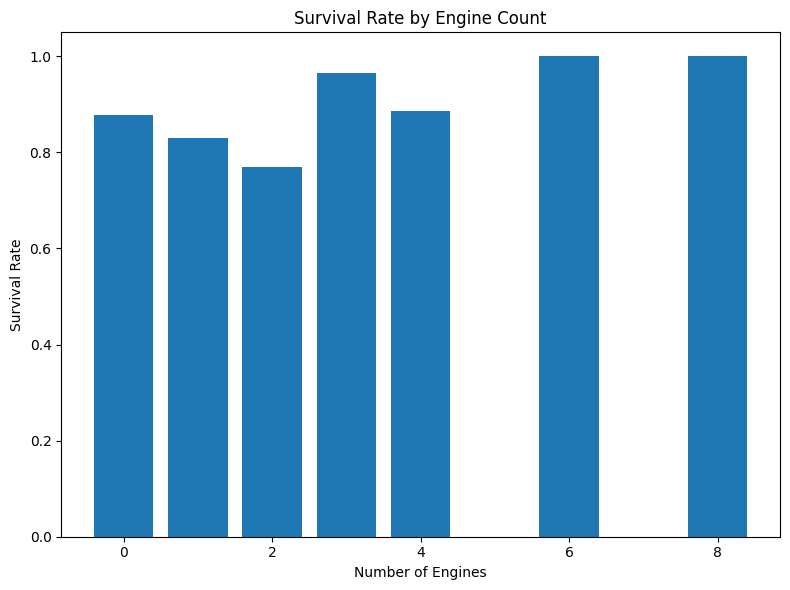

In [71]:
plt.figure(figsize=(8, 6))
plt.bar(engine_survival_rate.index, engine_survival_rate.values)
plt.title('Survival Rate by Engine Count')
plt.xlabel('Number of Engines')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

#  Injury Analysis Across Locations

In [72]:
country_injuries = data.groupby('Country')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

country_injuries['Total.Injuries'] = country_injuries['Total.Fatal.Injuries'] + country_injuries['Total.Serious.Injuries'] +country_injuries['Total.Minor.Injuries']
country_injuries = country_injuries.sort_values('Total.Injuries', ascending=False)
print(country_injuries.head(10))

               Total.Fatal.Injuries  Total.Serious.Injuries  \
Country                                                       
United States               30171.0                 16774.5   
Canada                        946.0                    94.0   
Brazil                       1243.0                    87.0   
Indonesia                     852.0                    27.0   
India                         970.0                    20.0   
France                        813.0                    47.0   
Colombia                      704.0                    61.0   
Mexico                        653.0                    80.0   
Russia                        765.0                    20.0   
China                         486.0                    23.0   

               Total.Minor.Injuries  Total.Injuries  
Country                                              
United States               23814.0         70759.5  
Canada                        514.0          1554.0  
Brazil                     

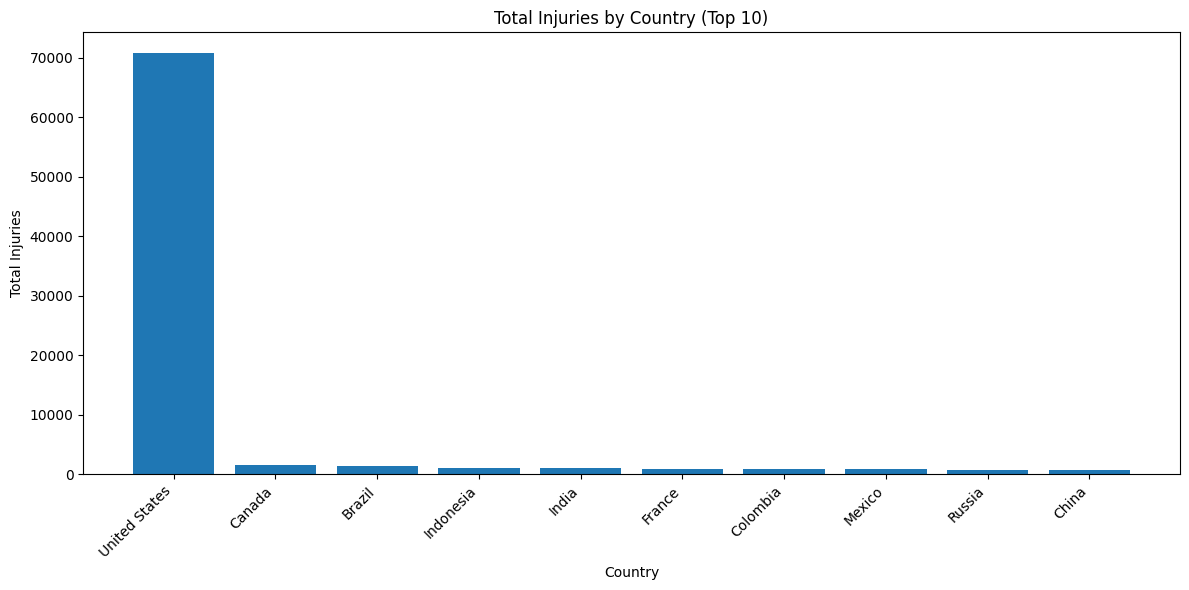

In [73]:
plt.figure(figsize=(12, 6))
plt.bar(country_injuries.index[:10], country_injuries['Total.Injuries'][:10])  # Plot top 10 countries
plt.title('Total Injuries by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Report

In [75]:
report= yd.ProfileReport(data)
report.to_file("/content/Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 3 ... 9 9 9]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]